In [106]:
from google.colab import files
uploaded = files.upload()

Saving blr-airport.csv to blr-airport.csv


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [205]:
path = '/content/blr-airport.csv'
df = pd.read_csv(path)

In [206]:
gdp_estimates = [3321, 3530, 3745, 3933, 4125, 4323, 4531]
fuel_estimates = [61.28, 68.19, 70.64, 73.78, 77.80, 81.36, 84.57]
forecast_range = [2024, 2025, 2026, 2027, 2028, 2029, 2030]
#forecast_range = [int(year) for year in forecast_range]

In [207]:
df = df[:13]
df = df[['year','gdp','traffic','fuel','GSDP']]

In [208]:
df

,year,gdp,traffic,fuel,GSDP
0,2011.0,"1,645","1,03,30,993",90.00,"5,50,000"
1,2012.0,"1,731","94,90,063",94.11,"6,06,010"
2,2013.0,"1,830","1,02,34,952",97.90,"6,43,033"
3,2014.0,"1,943","1,24,69,114",93.26,"7,04,466"
4,2015.0,"2,087","1,56,05,120",48.69,"7,48,429"
5,2016.0,"2,253","1,92,81,984",43.14,"8,31,330"
6,2017.0,"2,435","2,30,96,380",50.88,"9,41,774"
7,2018.0,"2,604","2,88,25,152",64.94,"10,19,708"
8,2019.0,"2,771","2,77,83,135",56.98,"10,85,101"
9,2020.0,"2,875","1,04,48,808",39.23,"11,48,806"


In [209]:
df['year'] = df['year'].astype(int)
df['gdp'] = df['gdp'].str.replace(',', '').astype(int)
df['traffic'] = df['traffic'].str.replace(',', '').astype(int)
df['GSDP'] = df['GSDP'].str.replace(',', '').astype(int)

In [210]:
df_excluded = df[:9]

In [211]:
df_excluded

,year,gdp,traffic,fuel,GSDP
0,2011,1645,10330993,90.00,550000
1,2012,1731,9490063,94.11,606010
2,2013,1830,10234952,97.90,643033
3,2014,1943,12469114,93.26,704466
4,2015,2087,15605120,48.69,748429
5,2016,2253,19281984,43.14,831330
6,2017,2435,23096380,50.88,941774
7,2018,2604,28825152,64.94,1019708
8,2019,2771,27783135,56.98,1085101


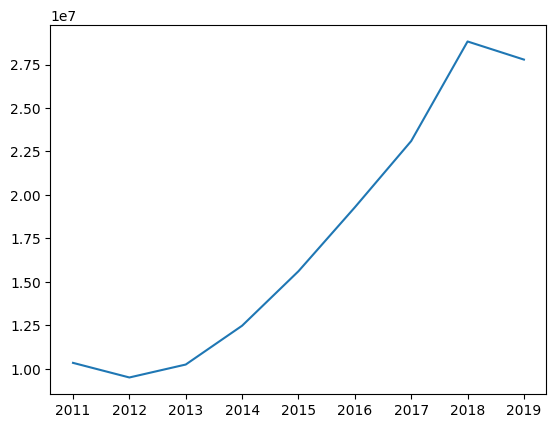

In [212]:
plt.plot(df_excluded['year'], df_excluded['traffic'])

In [213]:
full_gdp = list(df['gdp']) + gdp_estimates

X = df['gdp']
model = SARIMAX(df['traffic'], order=(1, 1, 1), exog=X)
model_fit = model.fit()

X_forecast = pd.DataFrame(gdp_estimates, columns=['gdp'])

predictions = model_fit.forecast(steps=len(forecast_range), exog=X_forecast)

predictions_df_gdp = pd.DataFrame({'year': forecast_range, 'traffic': predictions})

print(predictions_df_gdp)

    year       traffic
13  2024  3.319461e+07
14  2025  3.494577e+07
15  2026  3.722369e+07
16  2027  3.937438e+07
17  2028  4.166880e+07
18  2029  4.408042e+07
19  2030  4.663530e+07


In [214]:
X_forecast

,gdp
0,3321
1,3530
2,3745
3,3933
4,4125
5,4323
6,4531


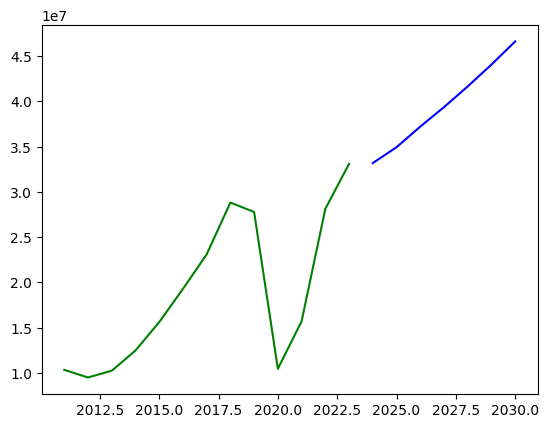

In [215]:
plt.plot(predictions_df_gdp['year'], predictions_df_gdp['traffic'], color='blue')
plt.plot(df['year'], df['traffic'], color='green')

In [216]:
full_fuel = list(df['fuel']) + fuel_estimates

X = df['fuel']
model = SARIMAX(df['traffic'], order=(1, 1, 1), exog=X)
model_fit = model.fit()

X_forecast = pd.DataFrame(fuel_estimates, columns=['fuel'])

predictions = model_fit.forecast(steps=len(forecast_range), exog=X_forecast)

predictions_df_fuel = pd.DataFrame({'year': forecast_range, 'traffic': predictions})

print(predictions_df_fuel)

    year       traffic
13  2024  3.414509e+07
14  2025  3.496816e+07
15  2026  3.529116e+07
16  2027  3.570092e+07
17  2028  3.622568e+07
18  2029  3.669039e+07
19  2030  3.710941e+07


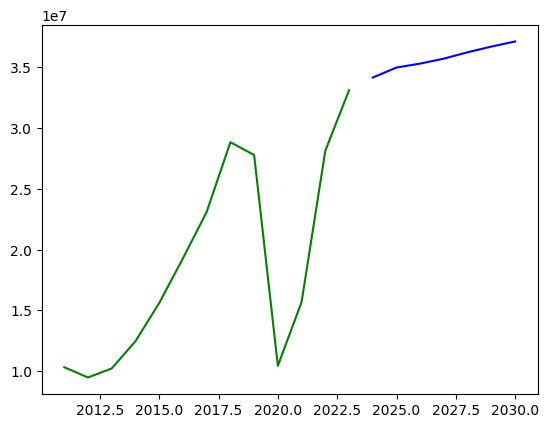

In [217]:
plt.plot(predictions_df_fuel['year'], predictions_df_fuel['traffic'], color='blue')
plt.plot(df['year'], df['traffic'], color='green')

In [218]:
model = SARIMAX(df['traffic'], order=(1,1,1), exog=df['gdp'])
model_fit = model.fit()

X_forecast = pd.DataFrame(gdp_estimates, columns=['gdp'])

predictions = model_fit.forecast(steps=len(forecast_range), exog=X_forecast)

predictions_df_gdp = pd.DataFrame({'year': forecast_range, 'traffic': predictions})

print(predictions_df_gdp)

    year       traffic
13  2024  3.319461e+07
14  2025  3.494577e+07
15  2026  3.722369e+07
16  2027  3.937438e+07
17  2028  4.166880e+07
18  2029  4.408042e+07
19  2030  4.663530e+07


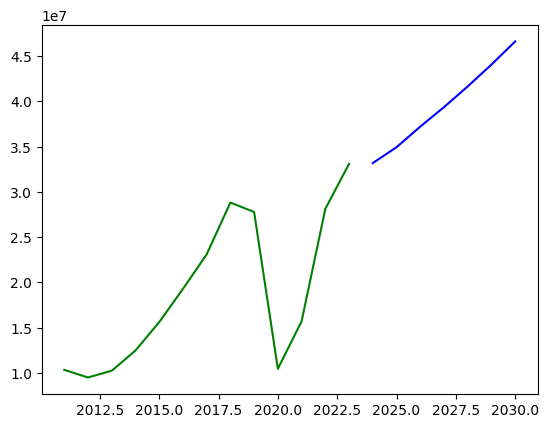

In [219]:
plt.plot(predictions_df_gdp['year'], predictions_df_gdp['traffic'], color='blue')
plt.plot(df['year'], df['traffic'], color='green')

In [220]:
model = SARIMAX(df['traffic'], order=(1,1,1), exog=df['fuel'])
model_fit = model.fit()

X_forecast = pd.DataFrame(fuel_estimates, columns=['fuel'])

predictions = model_fit.forecast(steps=len(forecast_range), exog=X_forecast)

predictions_df_fuel = pd.DataFrame({'year': forecast_range, 'traffic': predictions})

print(predictions_df_fuel)

    year       traffic
13  2024  3.414509e+07
14  2025  3.496816e+07
15  2026  3.529116e+07
16  2027  3.570092e+07
17  2028  3.622568e+07
18  2029  3.669039e+07
19  2030  3.710941e+07


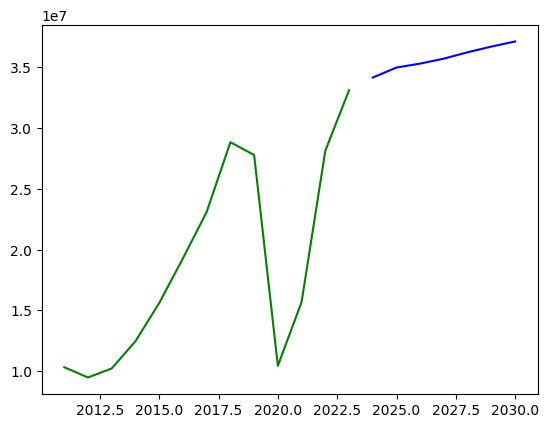

In [221]:
plt.plot(predictions_df_fuel['year'], predictions_df_fuel['traffic'], color='blue')
plt.plot(df['year'], df['traffic'], color='green')

In [222]:
model = SARIMAX(df['traffic'], order=(1, 1, 1), exog=df[['fuel', 'gdp']])
model_fit = model.fit()

X_forecast = pd.DataFrame({'fuel': fuel_estimates, 'gdp': gdp_estimates})

predictions = model_fit.forecast(steps=len(forecast_range), exog=X_forecast)

predictions_df = pd.DataFrame({'year': forecast_range, 'traffic': predictions})

print(predictions_df)

    year       traffic
13  2024  3.509516e+07
14  2025  4.015540e+07
15  2026  4.500464e+07
16  2027  4.902469e+07
17  2028  5.366032e+07
18  2029  5.801092e+07
19  2030  6.275216e+07


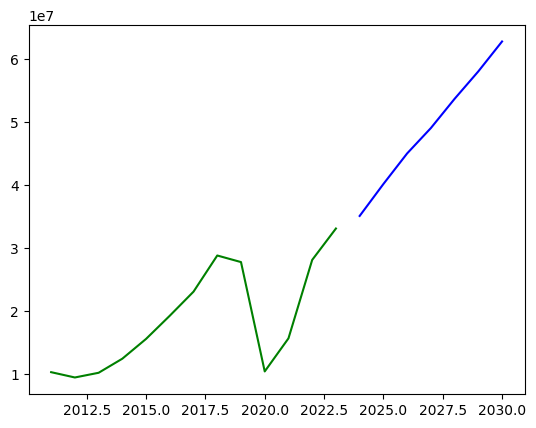

In [223]:
plt.plot(predictions_df['year'], predictions_df['traffic'], color='blue')
plt.plot(df['year'], df['traffic'], color='green')

In [236]:
correlation = df['GSDP'].corr(df['traffic'])
correlation

0.7385923103280115

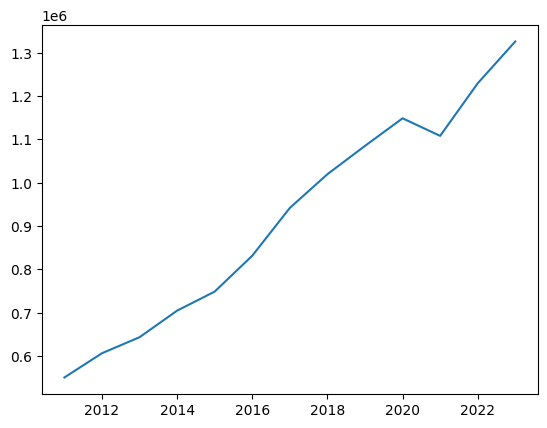

In [225]:
plt.plot(df['year'], df['GSDP'])

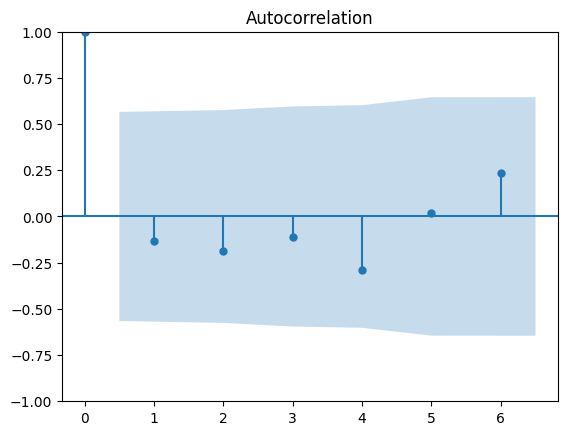

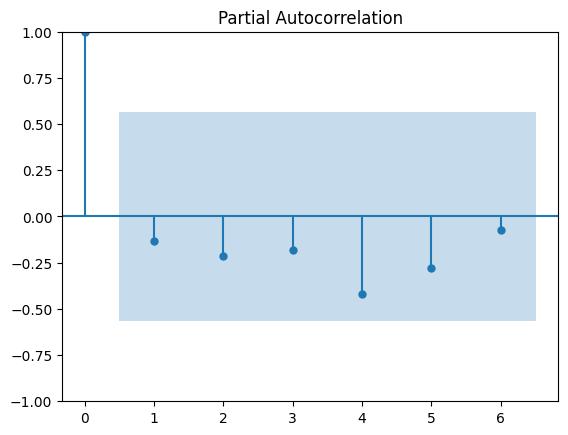

In [226]:
acf_original = plot_acf(df['GSDP'].diff().dropna())

pacf_original = plot_pacf(df['GSDP'].diff().dropna())

In [227]:
model = SARIMAX(df['GSDP'], order=(1, 1, 1))
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

gsdp_estimates = predictions.tolist()

print(gsdp_estimates)

[1388037.8555792398, 1449453.8779091202, 1510568.5528884977, 1571383.3591254328, 1631899.7679729634, 1692119.2435647028, 1752043.2428502631]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [232]:
model = SARIMAX(df['traffic'], order=(1,1,1), exog=df['GSDP'])
model_fit = model.fit()

X_forecast = pd.DataFrame(gsdp_estimates, columns=['GSDP'])

predictions = model_fit.forecast(steps=len(forecast_range), exog=X_forecast)

predictions_df_gsdp = pd.DataFrame({'year': forecast_range, 'traffic': predictions})

print(predictions_df_gsdp)

    year       traffic
13  2024  3.211805e+07
14  2025  3.258840e+07
15  2026  3.363894e+07
16  2027  3.491830e+07
17  2028  3.628536e+07
18  2029  3.768347e+07
19  2030  3.908988e+07


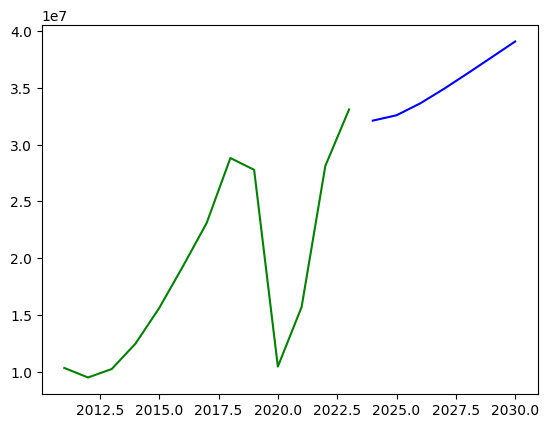

In [233]:
plt.plot(predictions_df_gsdp['year'], predictions_df_gsdp['traffic'], color='blue')
plt.plot(df['year'], df['traffic'], color='green')

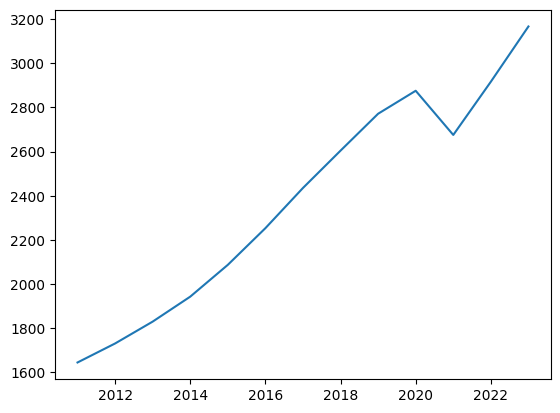

In [235]:
plt.plot(df['year'], df['gdp'])